# Combine EHR + Demographics + PRS + OB Notes 

Evaluating sample overlap when combining different sources of data.

In [1]:
import os, sys
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import pickle 

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 
from IPython.core.display import display, HTML    
display(HTML("<style>.container {width:90% !important; }</style>"))
%matplotlib inline 
np.set_printoptions(precision=5, suppress=True) 

In [2]:
sys.path.append("/dors/capra_lab/users/abraha1/bin/python_modules/pyvenn")
import venn 

In [3]:
from collections import OrderedDict

In [10]:
root_path="/dors/capra_lab/users/"
# root_path="/Volumes/"

In [15]:
# sys.path.append('/dors/capra_lab/users/abraha1/projects/PTB_phenotyping/scripts/rand_forest_ptb_classification')
sys.path.append( '/dors/capra_lab/users/abraha1/projects/PTB_phenotyping/scripts/rand_forest_ptb_classification')
from train_test_rf import load_labels 

/dors/capra_lab/users/abraha1/projects/PTB_phenotyping/scripts/rand_forest_ptb_classification/train_test_rf.py:22: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/accre/arch/easybuild/software/Compiler/GCC/6.4.0-2.28/Python/3.6.3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/accre/arch/easybuild/software/Compiler/GCC/6.4.0-2.28/Python/3.6.3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/accre/arch/easybuild/software/MPI/GCC/6.4.0-2.28/OpenMPI/2.1.1/IPython/5.8.0-Python-3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/accre/arch/easybuild/software/MPI/GC

# Load

In [16]:
OUTPUT_DIR = os.path.join(root_path, "abraha1/projects/PTB_phenotyping/data/ptb_predict_machine_learning/feature_matrices/add_ehr_data")


In [17]:
DELIVERY_LABELS_FILE = os.path.join(root_path,"abraha1/projects/PTB_phenotyping/data/combined_cohorts_07_12_2018/full_dataset_characterization/est_delivery_date_at_least_one_icd_cpt_ega.tsv")
DEMOGRAPHICS_FILE = os.path.join(root_path,"abraha1/projects/PTB_phenotyping/data/ptb_predict_machine_learning/demographics/complete_demographics.tsv")

In [18]:
FILES = [os.path.join(root_path,"abraha1/projects/PTB_phenotyping/scripts/polygenic_risk_scores/zhang_with_covars/GRID_PRS.tsv"),
         os.path.join(root_path,"abraha1/projects/PTB_phenotyping/data/ptb_predict_machine_learning/feature_matrices/cpt_codes/all_cpt_raw_count_feat_mat.tsv"), 
         os.path.join(root_path,"abraha1/projects/PTB_phenotyping/data/ptb_predict_machine_learning/feature_matrices/raw_counts/all_icd9_raw_count_feat_mat.tsv"),
         os.path.join(root_path,"abraha1/projects/PTB_phenotyping/data/ptb_predict_machine_learning/demographics/years_at_delivery_matrix.tsv"), 
         os.path.join(root_path,"abraha1/projects/PTB_phenotyping/data/ptb_predict_machine_learning/demographics/demographics_matrix.tsv"), 
         os.path.join(root_path,"abraha1/projects/PTB_phenotyping/data/ptb_predict_machine_learning/ob_notes_variables/filtered_wide_ob_notes_w_na_binary_and_counts.tsv"), # ob_notes
         os.path.join(root_path,"abraha1/projects/PTB_phenotyping/data/ptb_predict_machine_learning/feature_matrices/ob_notes_unstruct/filtered_cui_counts_ob_notes_feat_mat.tsv")] # unstructured notes 

In [19]:
short_hand_files = {'GRID_PRS.tsv':os.path.join(root_path,"abraha1/projects/PTB_phenotyping/scripts/polygenic_risk_scores/zhang_with_covars/GRID_PRS.tsv"),
                    'all_cpt_raw_count_feat_mat.tsv':os.path.join(root_path,"abraha1/projects/PTB_phenotyping/data/ptb_predict_machine_learning/feature_matrices/cpt_codes/all_cpt_raw_count_feat_mat.tsv"),
                    'all_icd9_raw_count_feat_mat.tsv':os.path.join(root_path,"abraha1/projects/PTB_phenotyping/data/ptb_predict_machine_learning/feature_matrices/raw_counts/all_icd9_raw_count_feat_mat.tsv"),
                    'years_at_delivery_matrix.tsv':os.path.join(root_path,"abraha1/projects/PTB_phenotyping/data/ptb_predict_machine_learning/demographics/years_at_delivery_matrix.tsv"),
                    'demographics_matrix.tsv':os.path.join(root_path,"abraha1/projects/PTB_phenotyping/data/ptb_predict_machine_learning/demographics/demographics_matrix.tsv"),
                    'filtered_wide_ob_notes_w_na_binary_and_counts.tsv':os.path.join(root_path,"abraha1/projects/PTB_phenotyping/data/ptb_predict_machine_learning/ob_notes_variables/filtered_wide_ob_notes_w_na_binary_and_counts.tsv"),
                    'filtered_cui_counts_ob_notes_feat_mat.tsv':os.path.join(root_path,"abraha1/projects/PTB_phenotyping/data/ptb_predict_machine_learning/feature_matrices/ob_notes_unstruct/filtered_cui_counts_ob_notes_feat_mat.tsv")}

In [20]:
DELIVERY_LABELS_FILE

'/dors/capra_lab/users/abraha1/projects/PTB_phenotyping/data/combined_cohorts_07_12_2018/full_dataset_characterization/est_delivery_date_at_least_one_icd_cpt_ega.tsv'

In [ ]:
# load delivery label and type  & demographics 
delivery_df = load_labels(DELIVERY_LABELS_FILE)
demo_df = pd.read_csv(DEMOGRAPHICS_FILE, sep="\t")

Loading delivery labels...
	0 out of 39008
	5000 out of 39008
	10000 out of 39008
	15000 out of 39008
	20000 out of 39008


In [ ]:
# LOAD FILES 
all_files_dict = OrderedDict()
for file in FILES: 
    df = pd.read_csv(file, sep="\t")
    all_files_dict[file] = df 

In [ ]:
# ensure there is a "GRID" column 
for key, df in all_files_dict.items(): 

    if "GRID" not in df.columns: 
        df.rename(columns={'grid':"GRID"}, inplace=True)
        
    print("GRID" in df.columns)
    print("{} size: {}".format(key, df.shape))

# Create sets of GRID for each dataset

In [ ]:
grids_w_labels = set(delivery_df.GRID.values)
demo_grids = set(demo_df.GRID.values).intersection(grids_w_labels)

In [ ]:
short_hand_files['all_cpt_raw_count_feat_mat.tsv']

In [ ]:
# combine a few of these together 
# *** note: only include grids with delivery labels *** 
combined_grids = set(all_files_dict[  short_hand_files['all_cpt_raw_count_feat_mat.tsv']     ].GRID.values).intersection(
                 set(all_files_dict[  short_hand_files['all_icd9_raw_count_feat_mat.tsv']    ].GRID.values)).intersection(
                 set(all_files_dict[  short_hand_files['demographics_matrix.tsv']            ].GRID.values)).intersection(
                 set(all_files_dict[  short_hand_files['years_at_delivery_matrix.tsv']       ].GRID.values)).intersection(grids_w_labels)

prs_grids = set(all_files_dict[ short_hand_files['GRID_PRS.tsv']].GRID.values).intersection(grids_w_labels)
ob_notes_grids = set(all_files_dict[short_hand_files['filtered_wide_ob_notes_w_na_binary_and_counts.tsv']].GRID.values).intersection(grids_w_labels)
cui_grids = set(all_files_dict[ short_hand_files["filtered_cui_counts_ob_notes_feat_mat.tsv"]].GRID.values).intersection(grids_w_labels)

icd9_grids = set(all_files_dict[    short_hand_files["all_icd9_raw_count_feat_mat.tsv"]  ].GRID.values).intersection(grids_w_labels)
cpt_grids = set(all_files_dict[     short_hand_files["all_cpt_raw_count_feat_mat.tsv"]   ].GRID.values).intersection(grids_w_labels)
age_grids = set(all_files_dict[     short_hand_files["years_at_delivery_matrix.tsv"]     ].GRID.values).intersection(grids_w_labels)
race_grids = set(all_files_dict[    short_hand_files["demographics_matrix.tsv"]          ].GRID.values).intersection(grids_w_labels)

## Visualize GRID overlap across datasets

(<Figure size 1152x1152 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2b403b1d3710>)

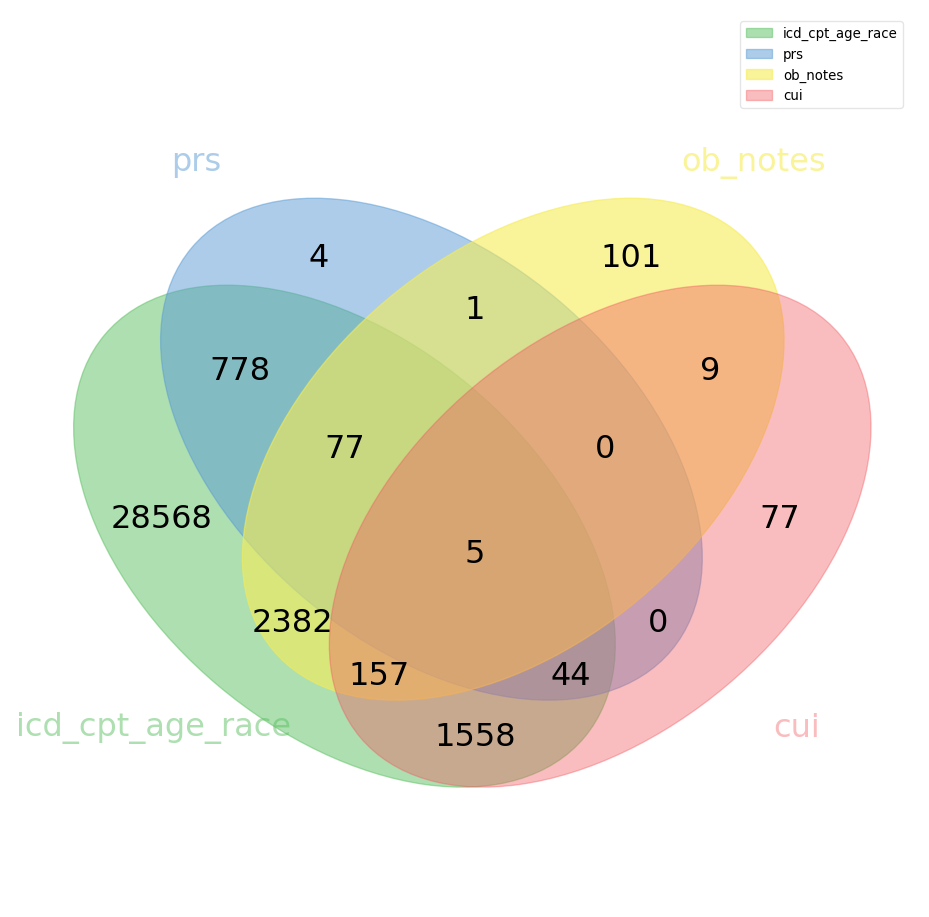

In [24]:
grids_list = [combined_grids, prs_grids, ob_notes_grids, cui_grids]
labels = venn.get_labels(grids_list, fill=['number'])
venn.venn4(labels, names=['icd_cpt_age_race', 'prs', 'ob_notes', 'cui'], fontsize=24)

Looks like there is a major drop out when adding the following to icd_cpt_age_race data   
1) PRS   
2) CUI   

Also note that the ob_notes and cui have very little overlap within themselves... Could potentially move people from green (icd_cpt_age_race) to the intersection of green + ob_notes + cui and forget about prs...



In [23]:
%matplotlib inline

(<Figure size 1152x1152 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2ad0a72c9358>)

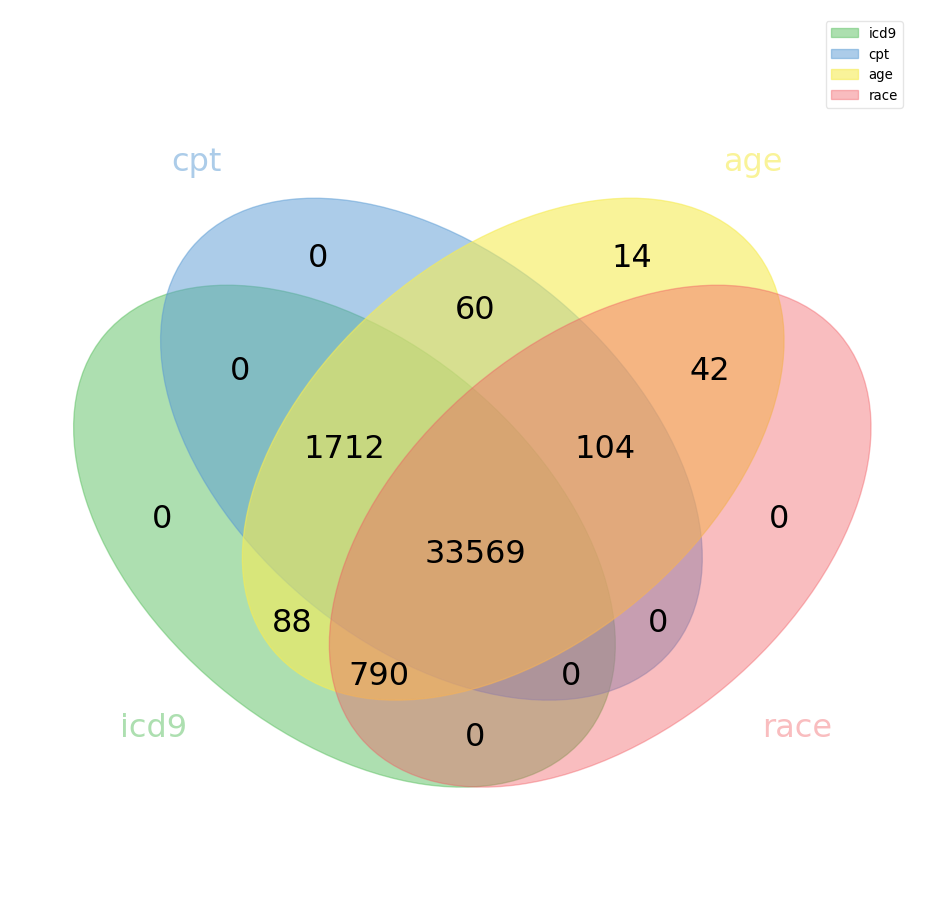

In [53]:
grids_list = [icd9_grids, cpt_grids, age_grids, race_grids]
labels = venn.get_labels(grids_list, fill=['number'])
venn.venn4(labels, names=['icd9', 'cpt', 'age', 'race'], fontsize=24)

Looks like there are two chunks peopl that are missing icd9, cpt, race, and age information. 

- one is those w/ icd9, cpt, and age without race information 
- another is those w/ icd9, cpt, and race information w/o age information

__try to figure out why these groups are missing data ...___

OK... SO the missing age grids are due to them having a 'None' delivery_label for the first delivery in the EHR.   These are filtered out when assigning delivery labels to grids for machince learning.

In [ ]:
missing_race_grids = icd9_grids.intersection(cpt_grids, age_grids).difference(race_grids)
missing_age_grids = icd9_grids.intersection(cpt_grids, race_grids).difference(age_grids)

In [ ]:
# check counts agaisnt venn diagram 
len(missing_race_grids)
len(missing_age_grids)

In [ ]:
demo_df.loc[demo_df.GRID.isin(missing_race_grids)].head()
demo_df.loc[demo_df.GRID.isin(missing_race_grids)].GRID.nunique()

print("Grids w/ missing race but w/ genetics: {}".format(len(missing_race_grids.intersection(prs_grids))))

So.... recovering the race information might be challening.  
and missing_age_grids due to 'None' delivery label that were not included for ML. 

# Creating Pairwise Comparision Datasets

Here, we will generate pairwise comparision datasets. For each pairwise comparision, there will be three datasets 1) data a 2) data b 3) data a & b.

In [44]:
baseline_grids = icd9_grids.intersection(cpt_grids)
icd_cpt_grids = icd9_grids.intersection(cpt_grids)

In [51]:
?venn.venn2

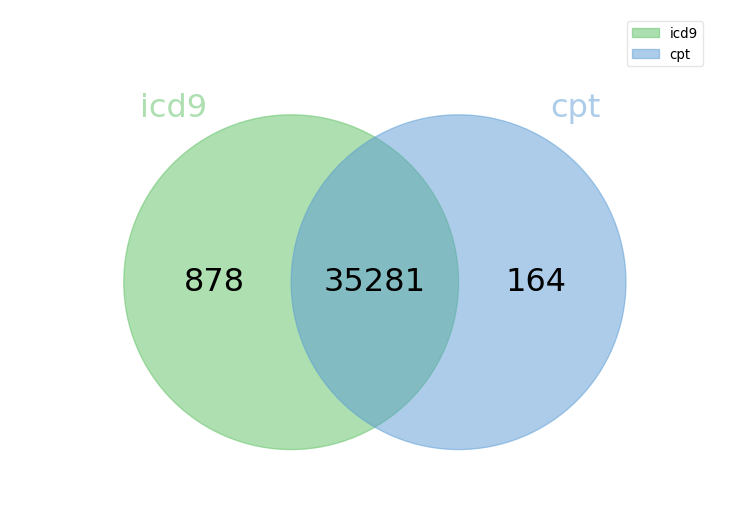

In [56]:
# compare to icd and cpt 
labels = venn.get_labels([icd9_grids, cpt_grids], fill=['number'])
nax = venn.venn2(labels, names=['icd9', 'cpt'], fontsize=24)

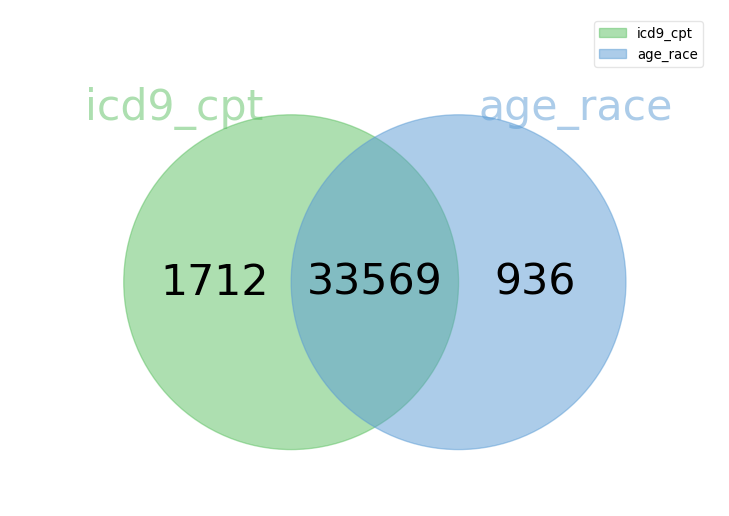

In [58]:
# compare to age & race 
labels = venn.get_labels([baseline_grids, age_grids.intersection(race_grids)], fill=['number'])
nax = venn.venn2(labels, names=['icd9_cpt', 'age_race'], fontsize=32)

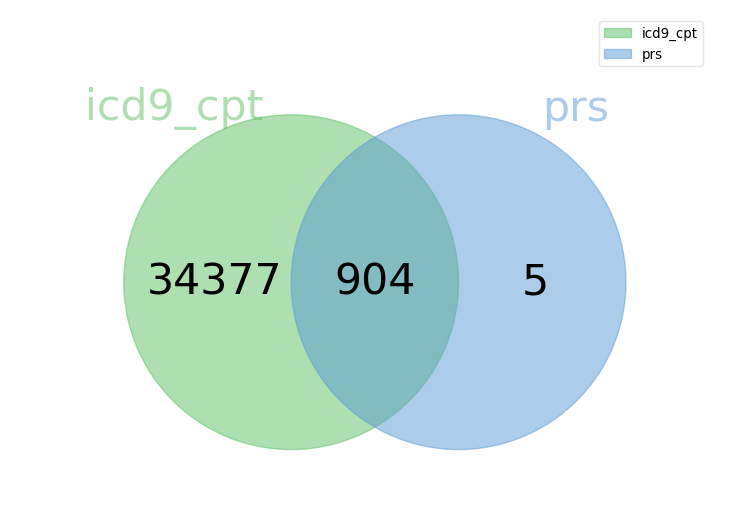

In [60]:
# compare to prs
labels = venn.get_labels([baseline_grids, prs_grids], fill=['number'])
nax = venn.venn2(labels, names=['icd9_cpt', 'prs'], fontsize=32)

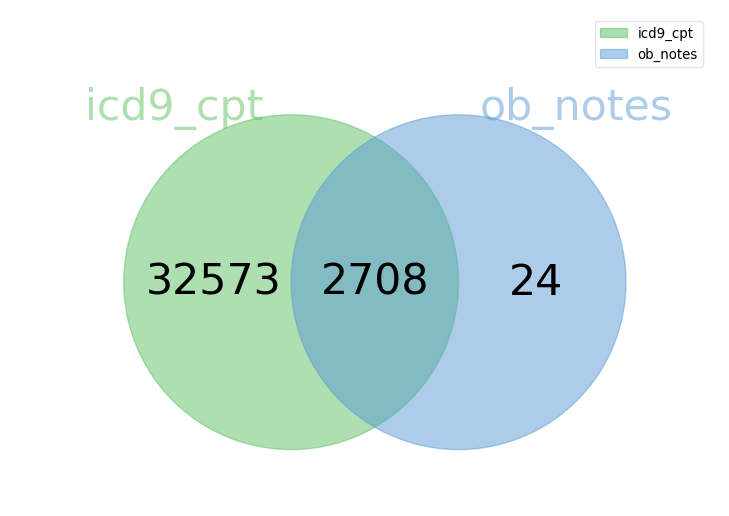

In [61]:
# compare to structured notes
labels = venn.get_labels([baseline_grids, ob_notes_grids], fill=['number'])
nax = venn.venn2(labels, names=['icd9_cpt', 'ob_notes'], fontsize=32)

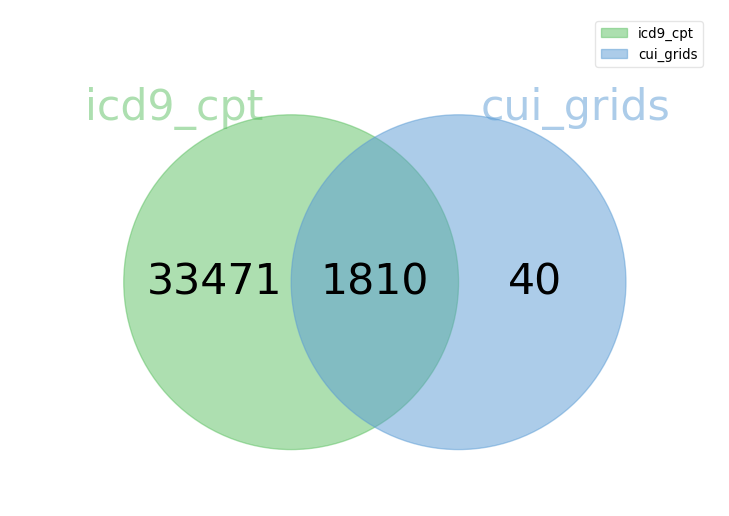

In [62]:
# compare to unstructured notes
labels = venn.get_labels([baseline_grids, cui_grids], fill=['number'])
nax = venn.venn2(labels, names=['icd9_cpt', 'cui_grids'], fontsize=32)

# Create Combined Datasets

In [39]:
def merge_two_df(df1, df2):
    df1_c = df1.copy()
    df2_c = df2.copy()    
    
    intersect = check_for_col_collisions(df1_c, df2_c)
    if  len(intersect) > 0:     
        df1_c.drop(intersect, axis=1, inplace=True)
        df2_c.drop(intersect, axis=1, inplace=True)
        
        print("removed conflicting columns: {}".format(intersect))
    
    
    merged_df = pd.merge(df1_c, df2_c, on="GRID", how="inner")

    return merged_df

In [40]:
def check_for_col_collisions(df1, df2): 
    old_cols = set(df1.columns)
    new_cols = set(df2.columns)
    old_cols.remove("GRID")
    new_cols.remove("GRID")
    intersect = old_cols.intersection(new_cols)
    
    return intersect

In [41]:
def create_pairwise_datasets(data1_df, data2_df, data1_grids, data2_grids): 
    ''' - data1_df and data2_df are merged on "GRID"
        - GRIDS shared between data1_df and data2_df are identified
        - three datasets are generated for shared GRIDS: 
            - data1_df w/ only shared GRIDS 
            - data2_df 2/ only shared GRIDS
            - merged data1_df and data2_Df w/ shared GRIDS
        '''
    keep_grids = data1_grids.intersection(data2_grids)
    data_1_2_df = merge_two_df(data1_df, data2_df)

    vs_data2__data1  = data1_df.loc[data1_df.GRID.isin(keep_grids),:].copy()
    vs_data2__data2 = data2_df.loc[data2_df.GRID.isin(keep_grids),:].copy()
    vs_data2__all  = data_1_2_df.loc[data_1_2_df.GRID.isin(keep_grids),:].copy()
    
    return vs_data2__data1, vs_data2__data2, vs_data2__all

In [42]:
all_files_dict.keys()

odict_keys(['/dors/capra_lab/users/abraha1/projects/PTB_phenotyping/scripts/polygenic_risk_scores/zhang_with_covars/GRID_PRS.tsv', '/dors/capra_lab/users/abraha1/projects/PTB_phenotyping/data/ptb_predict_machine_learning/feature_matrices/cpt_codes/all_cpt_raw_count_feat_mat.tsv', '/dors/capra_lab/users/abraha1/projects/PTB_phenotyping/data/ptb_predict_machine_learning/feature_matrices/raw_counts/all_icd9_raw_count_feat_mat.tsv', '/dors/capra_lab/users/abraha1/projects/PTB_phenotyping/data/ptb_predict_machine_learning/demographics/years_at_delivery_matrix.tsv', '/dors/capra_lab/users/abraha1/projects/PTB_phenotyping/data/ptb_predict_machine_learning/demographics/demographics_matrix.tsv', '/dors/capra_lab/users/abraha1/projects/PTB_phenotyping/data/ptb_predict_machine_learning/ob_notes_variables/filtered_wide_ob_notes_w_na_binary_and_counts.tsv', '/dors/capra_lab/users/abraha1/projects/PTB_phenotyping/data/ptb_predict_machine_learning/feature_matrices/ob_notes_unstruct/filtered_cui_count

In [43]:
# merge icd and cpt datasets 
icd_cpt_df = merge_two_df(all_files_dict[ short_hand_files['all_icd9_raw_count_feat_mat.tsv']], all_files_dict[short_hand_files['all_cpt_raw_count_feat_mat.tsv']])

removed conflicting columns: {'97601', '11440', '57135', '56501', '17000', '57452', '64445', '11402', '19120', '58300', '11920', '49320', '88150', '61070', '59025', '62230', '11421', '76818', '58100', '36569', '31237'}


In [45]:
# icd_cpt vs. age_race 
age_race_df = merge_two_df(all_files_dict[ short_hand_files['years_at_delivery_matrix.tsv']],
                             all_files_dict[  short_hand_files['demographics_matrix.tsv']])
vs_age_race__icd_cpt, vs_age_race__age_race, vs_age_race__all = create_pairwise_datasets(icd_cpt_df,
                                                                                         age_race_df,
                                                                                         icd_cpt_grids,
                                                                                         age_grids.intersection(race_grids))

In [50]:
# icd_cpt  + prs
vs_prs__icd_cpt, vs_prs__prs, vs_prs__all = create_pairwise_datasets(icd_cpt_df,
                                                                     all_files_dict[ short_hand_files['GRID_PRS.tsv']],
                                                                     icd_cpt_grids, 
                                                                     prs_grids)



In [51]:
vs_prs__icd_cpt.head()

,GRID,00.10,00.11,00.15,00.17,00.18,00.21,00.22,00.24,00.31,...,V5336,V5362,V5363,V5364,VOIBB4,VOICA30,VOICS6,VOIMD6,VOISR4,Y1405
24,R200032613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38,R200062041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74,R200110005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84,R200124055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
171,R200267128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
# icd_cpt  + structured notes 
vs_obnotes__icd_cpt, vs_obnotes__obnotes, vs_obnotes__all = create_pairwise_datasets(icd_cpt_df,
                                                                     all_files_dict[short_hand_files['filtered_wide_ob_notes_w_na_binary_and_counts.tsv']],
                                                                     icd_cpt_grids, 
                                                                     ob_notes_grids)



In [47]:
# icd_cpt  + unstructured notes 
# icd_cpt  + structured notes 
vs_unstruc__icd_cpt, vs_unstruc__unstruc, vs_unstruc__all = create_pairwise_datasets(icd_cpt_df,
                                                                     all_files_dict[short_hand_files['filtered_cui_counts_ob_notes_feat_mat.tsv']],
                                                                     icd_cpt_grids, 
                                                                     cui_grids)



In [ ]:
# write to file
vs_age_race__icd_cpt.to_csv( os.path.join(OUTPUT_DIR, 'vs_age_race__icd_cpt.tsv') , sep="\t", index=False)
vs_age_race__age_race.to_csv( os.path.join(OUTPUT_DIR, 'vs_age_race__age_race.tsv') , sep="\t", index=False)
vs_age_race__all.to_csv( os.path.join(OUTPUT_DIR, 'vs_age_race__all.tsv') , sep="\t", index=False)

In [52]:
vs_prs__icd_cpt.to_csv( os.path.join(OUTPUT_DIR, 'vs_prs__icd_cpt.tsv') , sep="\t", index=False)
vs_prs__prs.to_csv( os.path.join(OUTPUT_DIR, 'vs_prs__prs.tsv') , sep="\t", index=False)
vs_prs__all.to_csv( os.path.join(OUTPUT_DIR, 'vs_prs__all.tsv') , sep="\t", index=False)
vs_obnotes__icd_cpt.to_csv( os.path.join(OUTPUT_DIR, 'vs_obnotes__icd_cpt.tsv') , sep="\t", index=False)
vs_obnotes__obnotes.to_csv( os.path.join(OUTPUT_DIR, 'vs_obnotes__obnotes.tsv') , sep="\t", index=False)
vs_obnotes__all.to_csv( os.path.join(OUTPUT_DIR, 'vs_obnotes__all.tsv') , sep="\t", index=False)
vs_unstruc__icd_cpt.to_csv( os.path.join(OUTPUT_DIR, 'vs_unstruc__icd_cpt.tsv') , sep="\t", index=False)
vs_unstruc__unstruc.to_csv( os.path.join(OUTPUT_DIR, 'vs_unstruc__unstruc.tsv') , sep="\t", index=False)
vs_unstruc__all.to_csv( os.path.join(OUTPUT_DIR, 'vs_unstruc__all.tsv') , sep="\t", index=False)

In [53]:
OUTPUT_DIR

'/dors/capra_lab/users/abraha1/projects/PTB_phenotyping/data/ptb_predict_machine_learning/feature_matrices/add_ehr_data'

In [54]:
vs_prs__icd_cpt.shape
vs_prs__prs.shape
vs_prs__all.shape
vs_obnotes__icd_cpt.shape
vs_obnotes__obnotes.shape
vs_obnotes__all.shape
vs_unstruc__icd_cpt.shape
vs_unstruc__unstruc.shape
vs_unstruc__all.shape

(904, 20841)

(904, 2)

(904, 20842)

(2708, 20841)

(2708, 93)

(2708, 20933)

(1810, 20841)

(1810, 197)

(1810, 21037)